# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. DQN

### 5-1) Load DQN Agent

In [7]:
from brain.dqn import DQN
agent = DQN(state_size=len(env_info.vector_observations[0]), action_size=brain.vector_action_space_size, seed=0)
print('DQN is loaded successfully with observation size {} and action size={}'.format(len(env_info.vector_observations[0]), brain.vector_action_space_size))

DQN is loaded successfully with observation size 37 and action size=4


### 5-2) Hypterparameters Tunning

In [8]:
n_episodes=10000
n_steps=1000
eps_start=1.0
eps_end=0.1
eps_decay=0.993
print('Hyperparameters: Training Episodes={},  Steps={}, Starting Epsilon={}, Minimum Epsilon={}, Decaying Epsilon={}'.format(n_episodes, n_steps, eps_start, eps_end, eps_decay))

Hyperparameters: Training Episodes=10000,  Steps=1000, Starting Epsilon=1.0, Minimum Epsilon=0.1, Decaying Epsilon=0.993


### 5-3) Training Model

In [9]:
scores = []                 
scores_window = deque(maxlen=100)
eps = eps_start

for episode in range(1, n_episodes + 1):
    # Reset for training
    env_info = env.reset(train_mode=True)[brain_name]

    # Initialize first state
    state = env_info.vector_observations[0]
    score = 0

    for step in range(n_steps):
        # Action selection by DQN
        action = agent.act(state, eps)
        # Action type casting int64 to int32
        action = action.astype(np.int32)

        # Get the next state and reward
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]

        # Training
        agent.step(state, action, reward, next_state, done)
 
        # Update score and state
        score += reward
        state = next_state
        
        if done:
            break
            
    # Update epsilon
    eps = max(eps_end, eps * eps_decay)
    
    scores_window.append(score)
    scores.append(score)
    average_score = np.mean(scores_window)
    if episode % 50 == 0:
        print('--- episode = {}, average score = {: .2f}'.format(episode, average_score))

    # Success !!!
    if average_score >= 13:
        print('+++ Navigation banana project is solved successfully. Episodes = {}, Average = {: .2f}'.format(episode, average_score))
        break

--- episode = 50, average score =  0.36
--- episode = 100, average score =  1.18
--- episode = 150, average score =  3.34
--- episode = 200, average score =  5.26
--- episode = 250, average score =  6.69
--- episode = 300, average score =  8.13
--- episode = 350, average score =  9.42
--- episode = 400, average score =  11.02
--- episode = 450, average score =  12.35
+++ Navigation banana project is solved successfully. Episodes = 481, Average =  13.07


### 5-4) Save trained model

In [10]:
env.close()
agent.save_model('dqn_model_bongsang.pth')

Successfully saved to  dqn_model_bongsang.pth


### 5-5) Visualization (Simple version)

Text(0.5, 1.0, 'Banana Project by Bongsang')

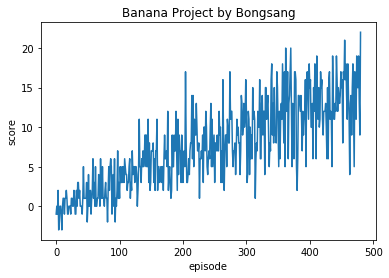

In [11]:
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('episode')
plt.title('Banana Project by Bongsang')

### 5-5) Visualization (Optional, Plotly version)
#### (You need a plotly account)

In [13]:
import pandas as pd
import plotly.plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

df = pd.DataFrame({'episode': np.arange(len(scores)), 'score': scores})

data = [
    go.Scatter(
        x = df['episode'],
        y = df['score'],
        mode = 'lines',
        name = 'score'
    ),
    go.Scatter(
        x = df['episode'],
        y = df['score'].rolling(100).mean(),
        mode = 'lines',
        name = 'moving average(100)'
    )
]
layout = go.Layout(title='Banana Project by Bongsang')
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

# Thank you ^^